About Spatial Crop
Cropping (sometimes also referred to as clipping), is when you subset or make a dataset smaller, by removing all data outside of the crop area or spatial extent. In this case you have a large raster - but let’s pretend that you only need to work with a smaller subset of the raster.

You can use the crop_image function to remove all of the data outside of your study area. This is useful as it:

Makes the data smaller and
Makes processing and plotting faster
In general when you can, it’s often a good idea to crop your raster data!

To begin let’s load the libraries that you will need in this lesson.

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5)

Open Raster and Vector Layers
In the previous lessons, you worked with a raster layer that looked like the one below. Notice that the data have an uneven edge on the left hand side. Let’s pretend this edge is outside of your study area and you’d like to remove it or clip it off using your study area extent. You can do this using the crop_image() function in earthpy.spatial.

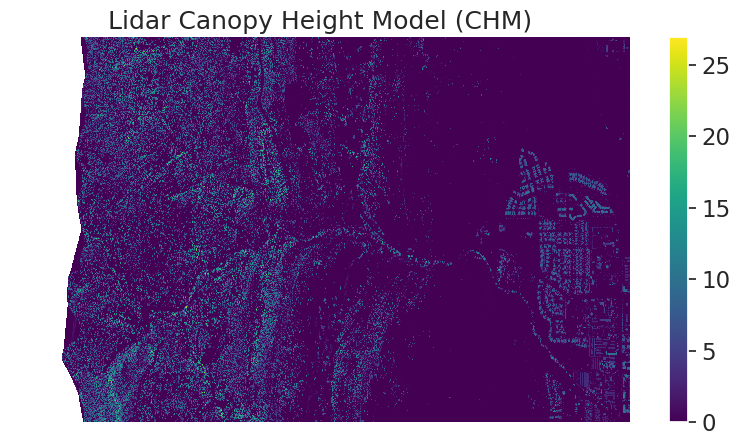

In [2]:
lidar_chm_path = os.path.join("data", "data", "colorado-flood", 
                              "spatial"
                              "boulder-leehill-rd",
                              "outputs",
                              "lidar_chm.tif")

lidar_chm_im = rxr.open_rasterio("data/data/colorado-flood/spatial/boulder-leehill-rd/outputs/lidar_chm.tif",
                                 masked=True).squeeze()

f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow()
ax.set(title="Lidar Canopy Height Model (CHM)")

ax.set_axis_off()
plt.show()

Open Vector Layer
To begin your clip, open up a vector layer that contains the crop extent that you want to use to crop your data. To open a shapefile you use the gpd.read_file() function from geopandas. You will learn more about vector data in Python in a few weeks.

In [3]:
aoi = os.path.join("data","data","colorado-flood",
                   "spatial",
                   "boulder-leehill-rd",
                   "clip-extent.shp")

# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file(aoi)

In [4]:
print('crop extent crs: ', crop_extent.crs)
print('lidar crs: ', lidar_chm_im.rio.crs)

crop extent crs:  EPSG:32613
lidar crs:  EPSG:32613


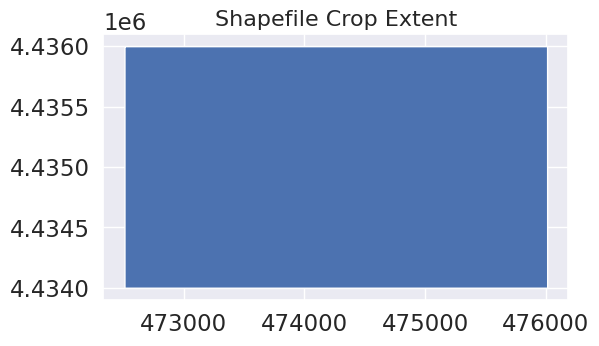

In [5]:
# Plot the crop boundary layer
# Note this is just an example so you can see what it looks like
# You don't need to plot this layer in your homework!
fig, ax = plt.subplots(figsize=(6, 6))

crop_extent.plot(ax=ax)

ax.set_title("Shapefile Crop Extent",
             fontsize=16)
plt.show()

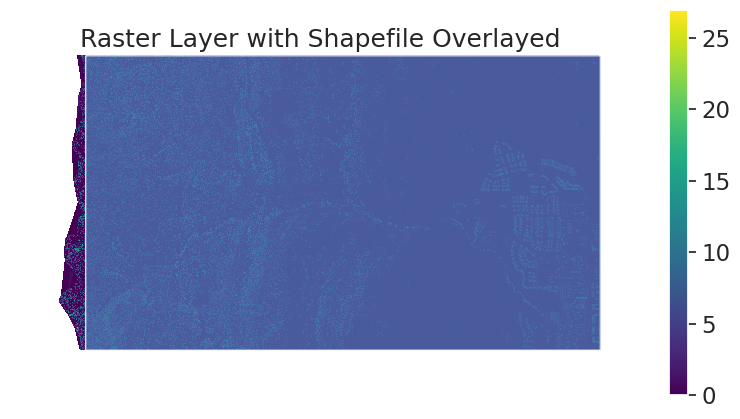

In [6]:
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow(ax=ax)

crop_extent.plot(ax=ax,
                 alpha=.8)
ax.set(title="Raster Layer with Shapefile Overlayed")

ax.set_axis_off()
plt.show()

Clip Raster Data Using RioXarray .clip
If you want to crop the data you can use the rio.clip function. When you clip the data, you can then export it and share it with colleagues. Or use it in another analysis.

To perform the clip you:

Open the raster dataset that you wish to crop using xarray or rioxarray.
Open your shapefile as a geopandas object.
Crop the data using the .clip() function.
.clip has several parameters that you can consider including

drop = True : The default. setting it will drop all pixels outside of the clip extent
invert = False : The default. If set to true it will clip all data INSIDE of the clip extent
crs : if your shapefile is in a different CRS than the raster data, pass the CRS to ensure the data are clipped correctly.
Below you clip the data to the extent of the AOI geodataframe imported above. The data are then plotted.

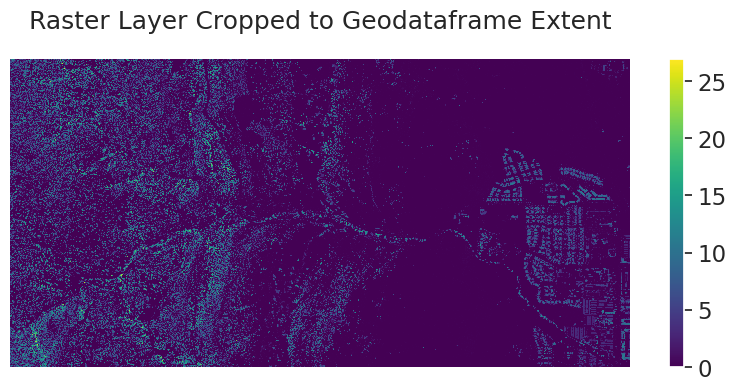

In [7]:
lidar_clipped = lidar_chm_im.rio.clip(crop_extent.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      crop_extent.crs)

f, ax = plt.subplots(figsize=(10, 4))
lidar_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

In [8]:
path_to_tif_file = os.path.join("data", "data", "colorado-flood",
                                "spatial",
                                "outputs",
                                "lidar_chm_cropped.tif")

# Write the data to a new geotiff file
lidar_clipped.rio.to_raster(path_to_tif_file)

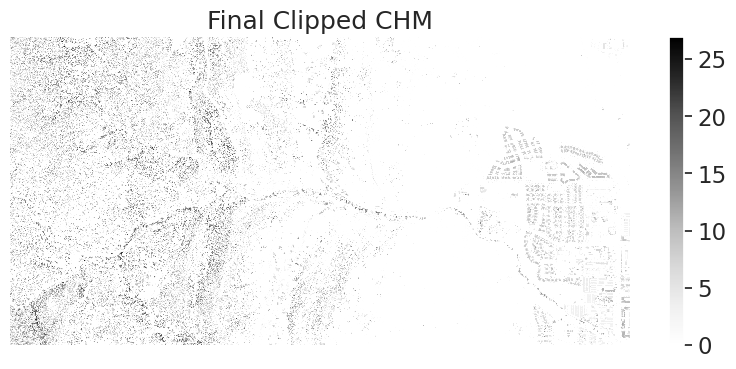

In [9]:
# Open the data you wrote out above
clipped_chm = rxr.open_rasterio(path_to_tif_file)

# Customize your plot as you wish!
f, ax = plt.subplots(figsize=(10, 4))
clipped_chm.plot(ax=ax,
                 cmap='Greys')
ax.set(title="Final Clipped CHM")
ax.set_axis_off()
plt.show()

#### Optional Challenge: Crop Change Over Time Layers
In the previous lesson, you created 2 plots:

1. A classified raster map that shows positive and negative change in the canopy height model before and after the flood. To do this you will need to calculate the difference between two canopy height models.
1. A classified raster map that shows positive and negative change in terrain extracted from the pre and post flood Digital Terrain Models before and after the flood.
Create the same two plots except this time CROP each of the rasters that you plotted using the shapefile: data/week-03/boulder-leehill-rd/crop_extent.shp

For each plot, be sure to:

- Add a legend that clearly shows what each color in your classified raster represents.
- Use proper colors.
- Add a title to your plot.
- You will include these plots in your final report due next week.

In [10]:
dtm_path_post = os.path.join("data", "data", "colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "post-flood",
                        "lidar",
                        "post_DTM.tif")
dsm_path_post = os.path.join("data", "data", "colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "post-flood",
                        "lidar",
                        "post_DSM.tif")
dtm_path_pre = os.path.join("data", "data", "colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "pre-flood",
                        "lidar",
                        "pre_DTM.tif")

dsm_path_pre = os.path.join("data", "data", "colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "pre-flood",
                        "lidar",
                        "pre_DSM.tif")

In [11]:
canopy_pre = rxr.open_rasterio(dsm_path_pre, masked=True).squeeze() - rxr.open_rasterio(dtm_path_pre, masked=True).squeeze()
canopy_post = rxr.open_rasterio(dsm_path_post, masked=True).squeeze() - rxr.open_rasterio(dtm_path_post, masked=True).squeeze()
terrain_pre = rxr.open_rasterio(dtm_path_pre, masked=True)
terrain_post = rxr.open_rasterio(dtm_path_post, masked=True)
canopy_change = canopy_pre - canopy_post
canopy_change = canopy_change.squeeze()
terrain_change = terrain_pre - terrain_post
terrain_change = terrain_change.squeeze()

In [12]:
crop_vector = gpd.read_file("data/data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp")

In [13]:
print(canopy_pre.rio.crs, canopy_change.rio.crs, terrain_change.rio.crs, terrain_pre.rio.crs, crop_vector.crs)

EPSG:32613 EPSG:32613 EPSG:32613 EPSG:32613 EPSG:32613


In [14]:
canopy_pre_cropped = canopy_pre.rio.clip(crop_vector.geometry.apply(mapping))
canopy_change_cropped = canopy_change.rio.clip(crop_vector.geometry.apply(mapping))
terrain_pre_cropped = terrain_pre.rio.clip(crop_vector.geometry.apply(mapping))
terrain_pre_cropped = terrain_change.rio.clip(crop_vector.geometry.apply(mapping))

In [15]:
crop_vector.geometry.apply(mapping)

0    {'type': 'Polygon', 'coordinates': (((472510.4...
Name: geometry, dtype: object

In [16]:
class_bins = [-np.inf, -5, 0, 0.01, 5, np.inf]

In [17]:
canopy_change_class = xr.apply_ufunc(np.digitize,
                                     canopy_change_cropped,
                                     class_bins)
canopy_change_class = canopy_change_class.where((canopy_change_class != 6) & (canopy_change_class != 3))


[Text(0.5, 1.0, 'Post Flood Change in Canopy Hight Model')]

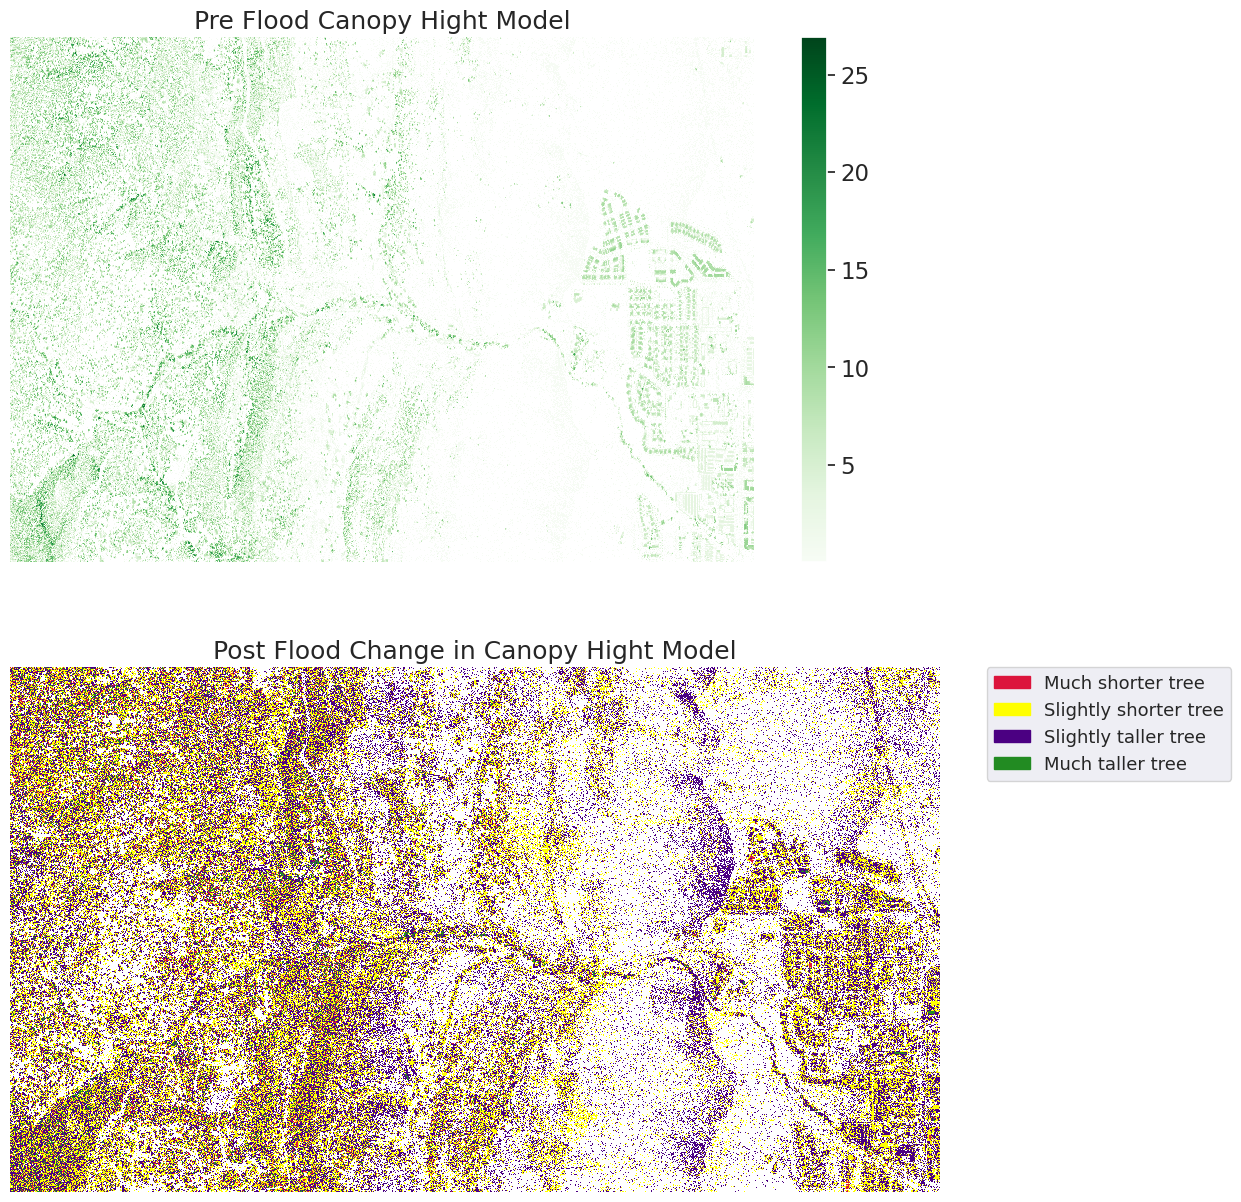

: 

In [19]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Create a list of labels to use for your legend
height_class_labels = ["Much shorter tree",
                       "Slightly shorter tree",
                       "Slightly taller tree",
                       "Much taller tree"]

# Create a colormap from a list of colors
colors = ['crimson',
          'yellow',
          'indigo',
          'forestgreen']

cmap = ListedColormap(colors)

# 3 is being skipped since it represents no hange and has been filitered out
class_bins_plot = [0.1,1.1,2.1,4.1,5.1]
norm = BoundaryNorm(class_bins_plot,
                    len(colors))

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 15))

canopy_pre_cropped = canopy_pre_cropped.where(canopy_pre_cropped > 0)
# canopy_post = canopy_post.where(canopy_post > 0)

canopy_pre_cropped.plot.imshow(ax=ax[0], cmap="Greens")

change_ax = canopy_change_class.plot.imshow(ax=ax[1], cmap=cmap, norm=norm, add_colorbar=False)

ep.draw_legend(change_ax, titles=height_class_labels)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].set(title="Pre Flood Canopy Hight Model")
ax[1].set(title="Post Flood Change in Canopy Hight Model")